In [1]:
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import matplotlib
import matplotlib.pyplot as plt
import pathlib, os, random, mplcyberpunk
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
path_to_cr_data = "C:/Users/Python Desk/Documents/FD-2022/PROJECTS/ML06/img/"

In [3]:
import os
img_dirs = []
for entry in os.scandir(path_to_cr_data):
    if entry.is_dir():
        img_dirs.append(entry.path)
print(img_dirs)

['C:/Users/Python Desk/Documents/FD-2022/PROJECTS/ML06/img/chris_evans', 'C:/Users/Python Desk/Documents/FD-2022/PROJECTS/ML06/img/chris_hemsworth', 'C:/Users/Python Desk/Documents/FD-2022/PROJECTS/ML06/img/mark_ruffalo', 'C:/Users/Python Desk/Documents/FD-2022/PROJECTS/ML06/img/robert_downey_jr', 'C:/Users/Python Desk/Documents/FD-2022/PROJECTS/ML06/img/scarlett_johansson']


In [4]:
#Getting the face detector xml
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [5]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)  #scaleFactor-how much the image size is reduced at each image scale, minNeighbors-helps reduce false positives
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]  #Region of Interest - roi
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

In [6]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            #cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

chris_evans
chris_hemsworth
mark_ruffalo
robert_downey_jr
scarlett_johansson


In [7]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'chris_evans': 0,
 'chris_hemsworth': 1,
 'mark_ruffalo': 2,
 'robert_downey_jr': 3,
 'scarlett_johansson': 4}

In [8]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (64, 64))
        X.append(scalled_raw_img)
        y.append(class_dict[celebrity_name])
        


In [9]:
# plt.imshow(X[0])

In [10]:
X= np.array(X)
y= np.array(y)
X.shape , y.shape

((196, 64, 64, 3), (196,))

In [11]:
X_train_orig, X_test_orig, y_train, y_test = train_test_split(X, y, train_size= 0.9 ,random_state=0)
X_train_orig.shape

(176, 64, 64, 3)

In [12]:
!pip install keras-facenet
from keras_facenet import FaceNet
embedder = FaceNet()

In [13]:
X_train = embedder.embeddings(X_train_orig)
X_test = embedder.embeddings(X_test_orig)
print('Train embed shape=',X_train.shape)
print('Test embed shape=',X_test.shape)

1/1 [==============================] - 1s 1s/step
Train embed shape= (176, 512)
Test embed shape= (20, 512)


In [14]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [15]:
model.score(X_test, y_test)

1.0

In [16]:
classes= ['chris_evans', 'mark_ruffalo','scarlett_johansson','chris_hemsworth','robert_downey_jr']

y_pred= model.predict(X_test)
y_predtr = model.predict(X_train)

In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         5

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



100.0 100.0


<Axes: >

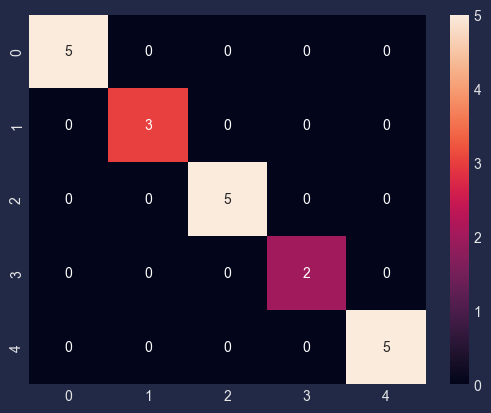

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
sns.set_style("whitegrid")

ac = accuracy_score(y_test,y_pred)*100
ac_tr = accuracy_score(y_train,y_predtr)*100
print(ac,ac_tr)
cm = confusion_matrix(y_test, y_pred)


# plt.figure(figsize=(12, 6))
plt.style.use('cyberpunk')
# plt.subplot(1, 2, 1)
# plt.plot(ac_tr, label='Training Accuracy')
# plt.title('Training Accuracy')
# plt.legend()
# mplcyberpunk.add_glow_effects()

# plt.subplot(1, 2, 2)
# plt.plot(ac, label='Testing Accuracy')
# plt.title('Testing Accuracy')
# plt.legend()
mplcyberpunk.add_glow_effects()

# plt.show()


# plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)

In [19]:
import pickle
pickle.dump(model, open("model_saved.pkl", "wb"))